In [1]:
#Do not need to run this line
#!mamba install -qy gmt pygmt

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import xarray as xr
import cartopy.crs as ccrs
import cartopy
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.feature as cfeature

In [3]:
from IPython import display
display.set_matplotlib_formats('retina')

In [4]:
data_dir = '/home/jovyan/data/bravoseis_data'

In [5]:
ds_ibsco = xr.load_dataset(data_dir + '/multibeam/temp.nc')
ds_ibsco

<xarray.Dataset>
Dimensions:  (x: 13335, y: 13341)
Coordinates:
  * x        (x) float64 -3.333e+06 -3.333e+06 ... 3.333e+06 3.334e+06
  * y        (y) float64 -3.337e+06 -3.336e+06 ... 3.333e+06 3.333e+06
Data variables:
    z        (y, x) float32 inf inf inf inf inf inf ... inf inf inf inf inf inf
Attributes:
    Conventions:  CF-1.7
    title:        Produced by grdconvert
    history:      grdconvert ibcso_v1_bed.grd -Gtemp.nc\n\t(old cmd) Created ...
    description:  Polar Stereographic projection with truescale at 71 degree S
    GMT_version:  6.3.0 [64-bit]

In [6]:
ds_ibsco = ds_ibsco.sel(x=slice(-2800000, -2400000),y = slice(1333250,1740000))

In [7]:
col_names = ['station','lon','lat','depth'] 
col_names2 = ['lat','lon','depth'] 

In [8]:
df_bathy = pd.read_csv(data_dir + '/multibeam/B6_19-20_trimmed.txt',
                  sep=' ', header=0, names=col_names2,
                  dtype = {'lon': np.float32,'lat': np.float32, 'depth': np.float32})
# cond1 = df_bathy["lat"] < -62    
# cond2 = df_bathy["lat"] > -63.5
# cond3 = df_bathy["lon"] > -61
# cond4 = df_bathy["lon"] < -56.5

# df_bathy = df_bathy[cond1 & cond2 & cond3 & cond4].copy()

df_bathy.tail()

lat        lon        depth
20792152 -62.13316 -57.196842 -1744.340942
20792153 -62.13316 -57.196552 -1744.340942
20792154 -62.13316 -57.196266 -1745.762939
20792155 -62.13316 -57.195980 -1745.806396
20792156 -62.13316 -57.195690 -1745.874512

In [9]:
df_allEvents = pd.read_pickle(data_dir + '/noaa_hydroacoustic/seasick_output/eqs.pkl')
df_allEvents['ep_lat']=df_allEvents['ep_lat']*-1
df_allEvents['ep_lon']=df_allEvents['ep_lon']*-1
#df_allEvents=df_allEvents.loc['2019-06-24 00:00:00':'2020-02-10 00:00:00']
df_allEvents.head()

h_count    h_id  ep_lat  ep_lon  er_lat  er_lon  \
time                                                                       
2019-03-31 01:04:14.800      3.0   654.0 -61.848 -56.832   0.632   0.821   
2019-03-31 01:56:14.800      3.0   654.0 -62.087 -57.118   0.229   0.244   
2019-03-31 02:07:09.700      3.0   654.0 -61.960 -56.979   0.396   0.487   
2019-03-31 02:19:50.000      3.0   654.0 -61.959 -56.979   0.397   0.488   
2019-03-31 02:38:16.600      4.0  6542.0 -61.988 -56.977   0.219   0.291   

                         er_time     mdb   mdb2 event notes  
time                                                         
2019-03-31 01:04:14.800   55.183  199.89  200.1    IQ   NaN  
2019-03-31 01:56:14.800   17.163  197.90  198.1    IQ   NaN  
2019-03-31 02:07:09.700   33.282  201.19  201.4    IQ   NaN  
2019-03-31 02:19:50.000   33.314  202.00  202.2   IDK   NaN  
2019-03-31 02:38:16.600   18.710  207.18  207.4    IQ   NaN

In [10]:
df_allEvents.describe()

h_count           h_id         ep_lat       ep_lon       er_lat  \
count    5645.000000    5527.000000    5645.000000  5645.000000  5645.000000   
mean      120.532329  130067.063143   -7864.080238   -37.746742    -1.009001   
std      8708.749977  199414.700867   59294.919418    44.427925     8.473020   
min         3.000000      61.994000 -654321.000000   -79.366000   -63.568000   
25%         3.000000     654.000000     -62.925000   -58.921000     0.025000   
50%         5.000000   21345.000000     -62.577000   -57.821000     0.054000   
75%         6.000000  213456.000000     -62.155000   -56.952000     0.146000   
max    654321.000000  654321.000000      70.565000    77.488000    68.835000   

            er_lon      er_time          mdb  
count  5645.000000  5645.000000  5645.000000  
mean      0.411944    10.822462   191.027963  
std       2.042704    20.652920    27.681189  
min       0.000000     0.000000     0.505000  
25%       0.030000     1.212000   189.260000  
50%       0.053000     3.005000   194.350000  
75%       0.186000     9.313000   199.520000  
max      61.273000   207.310000   230.460000

In [11]:
df_eqs = df_allEvents.loc[df_allEvents['event'] == 'EQ'].copy()# .copy creates its own dataframe 
cond1 = df_eqs["ep_lat"] < -62   
cond2 = df_eqs["ep_lat"] > -63.5
cond3 = df_eqs["ep_lon"] > -61
cond4 = df_eqs["ep_lon"] < -56.5

df_eqs = df_eqs[cond1 & cond2 & cond3 & cond4].copy()
df_eqs.head()

h_count    h_id  ep_lat  ep_lon  er_lat  er_lon  \
time                                                                       
2019-03-31 02:55:05.300      3.0   653.0 -62.027 -56.719   0.424   1.108   
2019-03-31 02:59:43.800      4.0  6542.0 -62.253 -57.150   0.059   0.035   
2019-03-31 06:58:25.400      3.0   236.0 -62.615 -59.769   0.041   0.192   
2019-03-31 07:53:36.800      3.0   321.0 -62.558 -59.524   0.025   0.043   
2019-03-31 17:11:58.500      4.0  3214.0 -62.506 -59.360   0.020   0.027   

                         er_time     mdb   mdb2 event notes  
time                                                         
2019-03-31 02:55:05.300   50.174  206.26  206.2    EQ   NaN  
2019-03-31 02:59:43.800    0.794  199.98  200.3    EQ   NaN  
2019-03-31 06:58:25.400    5.341  207.05  207.3    EQ   NaN  
2019-03-31 07:53:36.800    1.456  205.77  206.0    EQ   NaN  
2019-03-31 17:11:58.500    1.074  207.27  207.4    EQ   NaN

In [12]:
df_eqs.describe()

h_count           h_id      ep_lat      ep_lon      er_lat  \
count  306.000000     306.000000  306.000000  306.000000  306.000000   
mean     4.725490  190190.464052  -62.490363  -58.050382    0.098281   
std      1.213235  250761.489771    0.331559    1.033208    0.138406   
min      3.000000     123.000000  -63.451000  -60.945000    0.000000   
25%      4.000000    2134.000000  -62.710500  -58.732000    0.025000   
50%      5.000000   45632.000000  -62.381000  -57.758000    0.047500   
75%      6.000000  344541.000000  -62.226250  -57.131500    0.128000   
max      6.000000  654321.000000  -62.027000  -56.607000    1.426000   

           er_lon     er_time         mdb  
count  306.000000  306.000000  306.000000  
mean     0.155709    7.182255  199.180229  
std      0.278647   11.329078    7.404021  
min      0.000000    0.015000  178.910000  
25%      0.032000    1.121000  194.670000  
50%      0.055000    2.846000  198.915000  
75%      0.163000    8.558000  203.880000  
max      3.233000   99.999000  225.310000

In [13]:
df_eqs['temp'] = (df_eqs['mdb']- df_eqs['mdb'].min())
df_eqs['normalized'] = (df_eqs['temp']/df_eqs['temp'].max())
#df_eqs['eq_time']= (df_eqs['source_time']-df_eqs['source_time'].min())/(60*60*24)
df_eqs.head()

h_count    h_id  ep_lat  ep_lon  er_lat  er_lon  \
time                                                                       
2019-03-31 02:55:05.300      3.0   653.0 -62.027 -56.719   0.424   1.108   
2019-03-31 02:59:43.800      4.0  6542.0 -62.253 -57.150   0.059   0.035   
2019-03-31 06:58:25.400      3.0   236.0 -62.615 -59.769   0.041   0.192   
2019-03-31 07:53:36.800      3.0   321.0 -62.558 -59.524   0.025   0.043   
2019-03-31 17:11:58.500      4.0  3214.0 -62.506 -59.360   0.020   0.027   

                         er_time     mdb   mdb2 event notes   temp  normalized  
time                                                                            
2019-03-31 02:55:05.300   50.174  206.26  206.2    EQ   NaN  27.35    0.589440  
2019-03-31 02:59:43.800    0.794  199.98  200.3    EQ   NaN  21.07    0.454095  
2019-03-31 06:58:25.400    5.341  207.05  207.3    EQ   NaN  28.14    0.606466  
2019-03-31 07:53:36.800    1.456  205.77  206.0    EQ   NaN  26.86    0.578879  
2019-03-31 17:11:58.500    1.074  207.27  207.4    EQ   NaN  28.36    0.611207

In [14]:
df_stations = pd.read_csv(data_dir + '/multibeam/stations.csv',
                  sep=',', header=0, names=col_names,
                  dtype = {'station': str, 'lon': np.float64,
                           'lat': np.float64, 'depth': np.float64})

df_stations.head(10)

station       lon      lat   depth
0   BRA28 -60.19965 -62.9151  1019.0
1   BRA29 -59.45024 -62.8499  1236.0
2   BRA30 -58.89979 -62.5159  1538.0
3   BRA31 -58.00078 -62.5334  1765.0
4   BRA32 -58.00000 -62.2974  1928.0
5   BRA33 -57.09978 -62.2498  1717.0

In [15]:
# stations = df_stations.hvplot.points(x='lon', y='lat', c ='r',
#                         geo=True, s='1000')

In [16]:
# bathy_alt = df_bathy_alt.hvplot.points(x='lon', y='lat', c ='depth',
#                         geo=True, datashade = True,
#                       cmap = 'bone_r')

In [17]:
# bathy = df_bathy.hvplot.points(x='lon', y='lat', c ='depth',
#                         geo=True, datashade = True,
#                       cmap = 'bone_r')

In [18]:
#bathy*stations

In [19]:
url = 'http://geoport.whoi.edu/thredds/dodsC/bathy/srtm30plus_v6'

In [20]:
#ds = xr.open_dataset(url)
#ds

In [21]:
#ds.topo.plot()

In [22]:
#ds_bran = ds.sel(lon=slice(-61 ,-56.5),lat = slice(-62, -63.5))

In [23]:
#ds_bran

In [24]:
#topo = ds_bran.topo.plot(cmap = 'Greys')

In [25]:
# padding = 0.3
# extents = [min(ds_bran.lon)-padding, max(ds_bran.lon)+padding, min(ds_bran.lat)-padding/2, max(ds_bran.lat)+padding/2]
# extents

In [26]:
# plt.rcParams['figure.figsize'] = (12,12)
# # central_lon = np.mean(extents[0:2])
# central_lat = np.mean(extents[2:4])
# ax = plt.axes(projection=ccrs.Mercator(central_longitude=central_lon, min_latitude=min(ds_bran.lat)-padding/2, max_latitude=max(ds_bran.lat)+padding/2, globe=None, latitude_true_scale=central_lat))
# ax.set_extent(extents)
# orca_decimate = df_bathy.iloc[::10, :]
# sc = ax.scatter(orca_decimate.lon, orca_decimate.lat, c=orca_decimate.depth,
#            s=0.2, transform=ccrs.PlateCarree(), cmap='bone_r')
# plt.colorbar(sc, shrink=0.8)
# gl = ax.gridlines(draw_labels=False, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
# #ax.coastlines(resolution='10m');
# ax.add_feature(cartopy.feature.LAND, edgecolor='black')
# sc = ax.scatter(df_eqs.ep_lon,
#                 df_eqs.ep_lat,
#                 transform= ccrs.PlateCarree(),
#                s=np.square(df_eqs.normalized)*1000)
# #cbar = plt.colorbar(sc, label = 'Date')
# #cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format = '%m/%d'))

In [27]:
#Scratch

In [28]:
#ccrs.Orthographic?

In [29]:
c_dict = df_eqs.index.map(pd.Series(data=np.arange(306), index=df_eqs.index.values).to_dict())

In [30]:
c_dict

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            296, 297, 298, 299, 300, 301, 302, 303, 304, 305],
           dtype='int64', name='time', length=306)

In [31]:
padding = .3
extents = [-61-padding,-56.5+padding, -63.5-padding/2, -62+padding/2]
extents

[-61.3, -56.2, -63.65, -61.85]

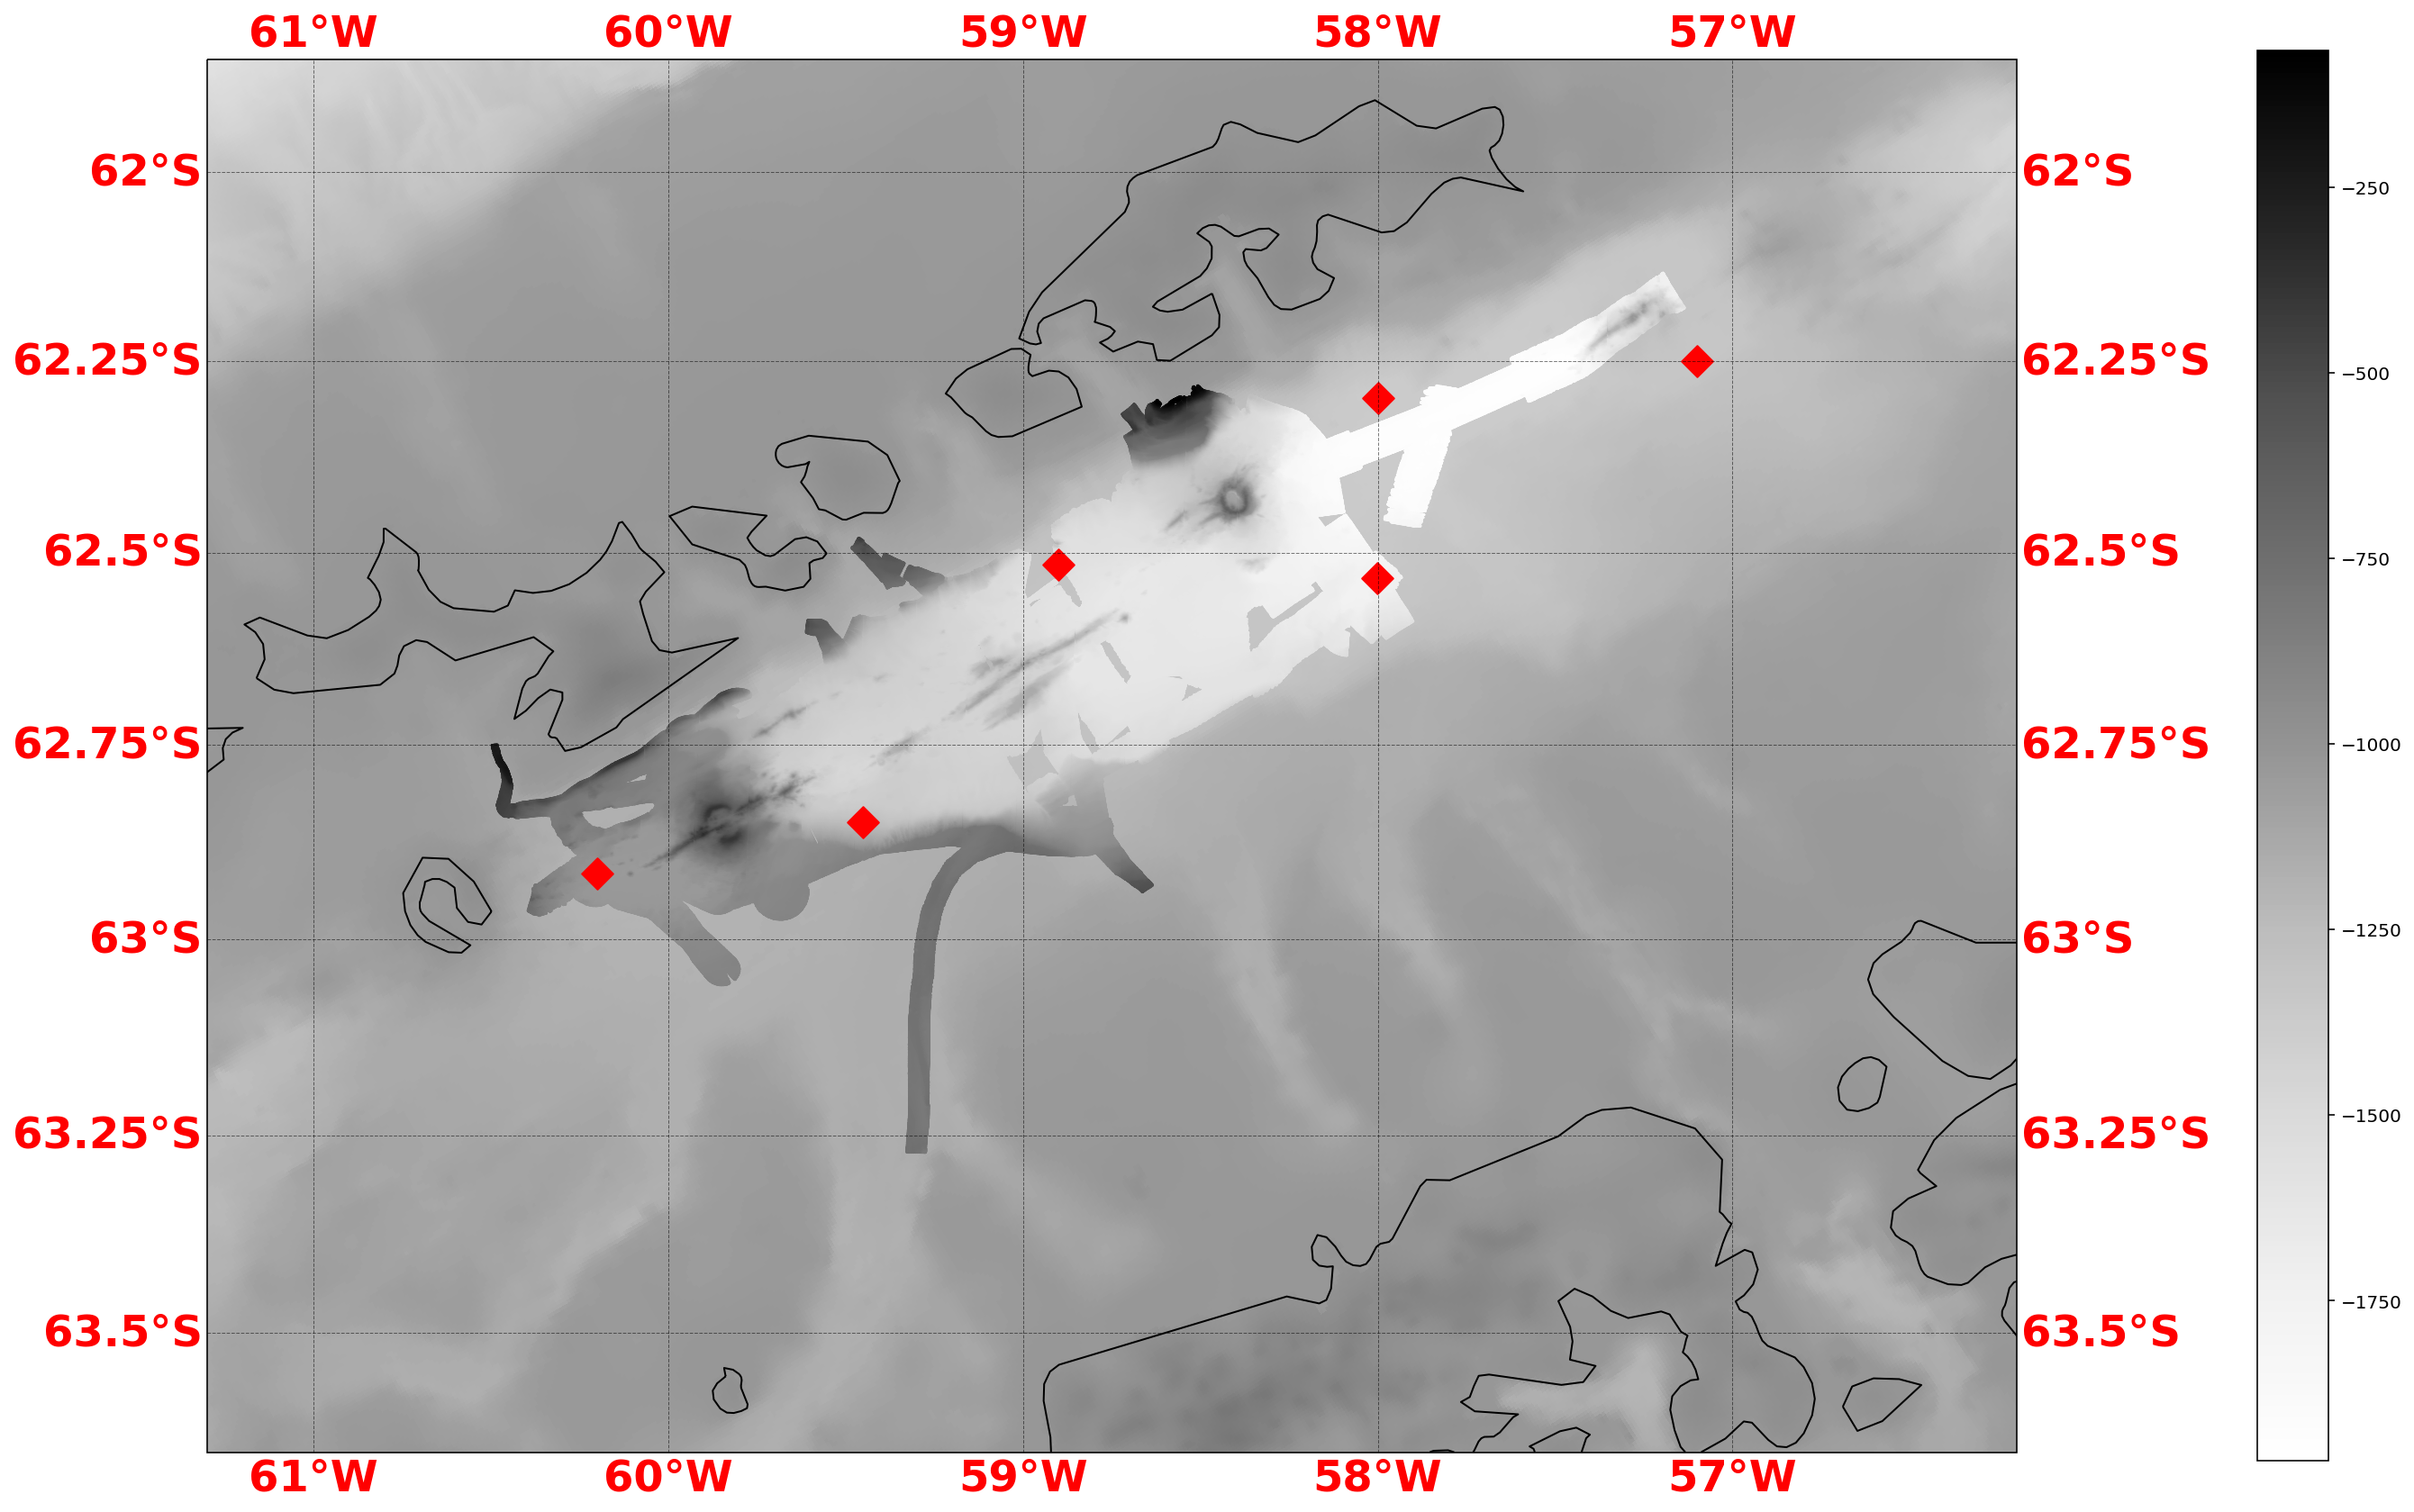

In [32]:
plt.close()
central_lon = np.mean(extents[0:2])
central_lat = np.mean(extents[2:4])
plt.rcParams['figure.figsize'] = (24,24)
ax = plt.axes(projection=ccrs.Mercator(central_longitude=central_lon, min_latitude=extents[2], max_latitude=extents[3], globe=None, latitude_true_scale=central_lat))
ax.set_extent(extents)
orca_decimate = df_bathy.iloc[::10, :]
ax.coastlines()
sc = ds_ibsco.z.plot(ax=ax, transform=ccrs.SouthPolarStereo(true_scale_latitude=-71), cmap='Greys', **{'add_colorbar':False})
dc = ax.scatter(orca_decimate.lon, orca_decimate.lat, c=orca_decimate.depth,
         s=0.2, transform=ccrs.PlateCarree(), cmap='Greys')
plt.colorbar(dc, shrink=0.6, pad = 0.1)
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='black', alpha=0.5, linestyle='--')
gl.xlabel_style = {'color': 'red', 'weight': 'bold', 'size': 24}
gl.ylabel_style = {'color': 'red', 'weight': 'bold', 'size': 24}
ax.add_feature(cartopy.feature.LAND, edgecolor='black')

sc = ax.scatter(df_stations.lon,df_stations.lat, c = 'r',marker='D',
         s=150, transform=ccrs.PlateCarree())

plt.savefig('figures/Stations.png')

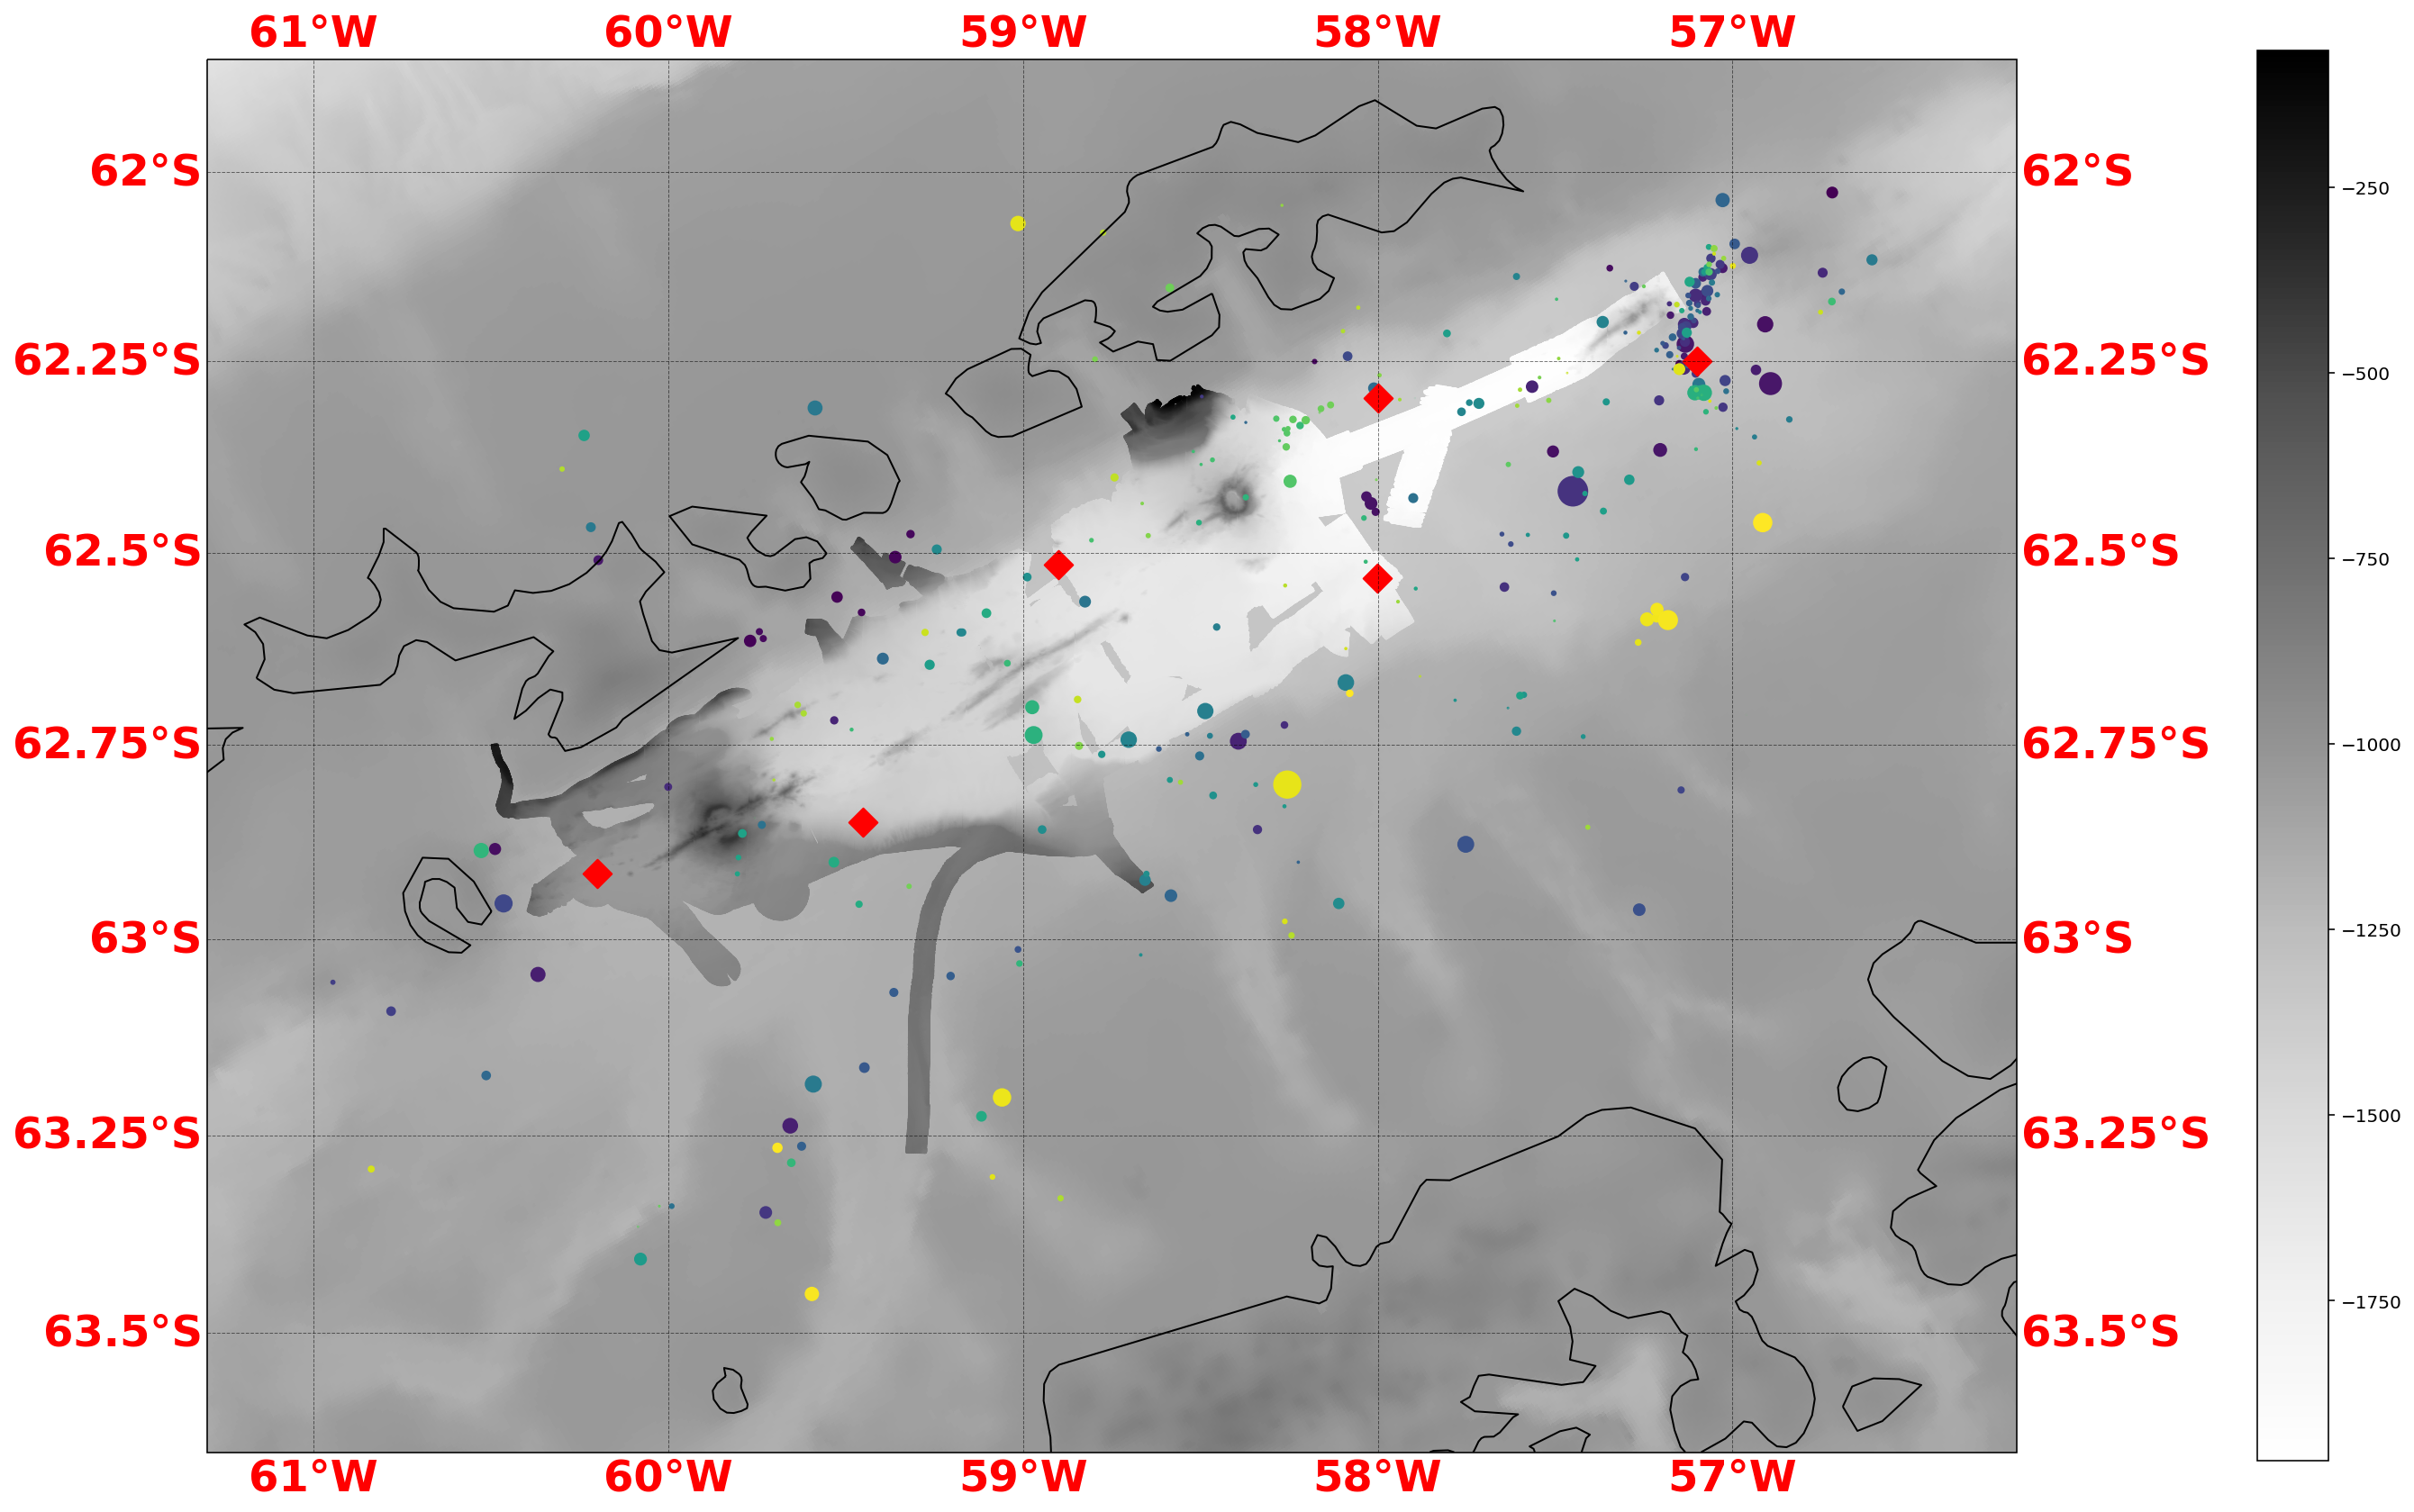

In [39]:
plt.close()
central_lon = np.mean(extents[0:2])
central_lat = np.mean(extents[2:4])
plt.rcParams['figure.figsize'] = (24,24)
ax = plt.axes(projection=ccrs.Mercator(central_longitude=central_lon, min_latitude=extents[2], max_latitude=extents[3], globe=None, latitude_true_scale=central_lat))
ax.set_extent(extents)
orca_decimate = df_bathy.iloc[::10, :]
ax.coastlines()
sc = ds_ibsco.z.plot(ax=ax, transform=ccrs.SouthPolarStereo(true_scale_latitude=-71), cmap='Greys', **{'add_colorbar':False})
dc = ax.scatter(orca_decimate.lon, orca_decimate.lat, c=orca_decimate.depth,
         s=0.2, transform=ccrs.PlateCarree(), cmap='Greys')
plt.colorbar(dc, shrink=0.6, pad = 0.1)
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='black', alpha=0.5, linestyle='--')
gl.xlabel_style = {'color': 'red', 'weight': 'bold', 'size': 24}
gl.ylabel_style = {'color': 'red', 'weight': 'bold', 'size': 24}
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ac = ax.scatter(df_eqs.ep_lon,
                df_eqs.ep_lat,
                transform= ccrs.PlateCarree(),
               s=np.power(df_eqs.normalized*4, 4), c = c_dict)
sc = ax.scatter(df_stations.lon,df_stations.lat, c = 'r',marker='D',
         s=125, transform=ccrs.PlateCarree())

plt.savefig('figures/eqs.png')

# Ice Quakes 

In [40]:
df_iqs = df_allEvents.loc[df_allEvents['event'] == 'IQ'].copy()# .copy creates its own dataframe 
cond1 = df_iqs["ep_lat"] < -62   
cond2 = df_iqs["ep_lat"] > -63.5
cond3 = df_iqs["ep_lon"] > -61
cond4 = df_iqs["ep_lon"] < -56.5

df_iqs = df_iqs[cond1 & cond2 & cond3 & cond4].copy()
df_iqs['temp'] = (df_iqs['mdb']- df_iqs['mdb'].min())
df_iqs['normalized'] = (df_iqs['temp']/df_iqs['temp'].max())
df_iqs.head()

h_count      h_id  ep_lat  ep_lon  er_lat  er_lon  \
time                                                                         
2019-03-31 01:56:14.800      3.0     654.0 -62.087 -57.118   0.229   0.244   
2019-03-31 02:44:06.400      5.0   23156.0 -62.700 -59.520   0.012   0.030   
2019-03-31 03:52:59.500      6.0  231456.0 -62.541 -59.579   0.019   0.035   
2019-03-31 04:37:20.300      4.0    5463.0 -62.263 -57.844   0.030   0.034   
2019-03-31 05:29:49.400      3.0     654.0 -62.139 -57.219   0.150   0.094   

                         er_time     mdb   mdb2 event notes   temp  normalized  
time                                                                            
2019-03-31 01:56:14.800   17.163  197.90  198.1    IQ   NaN  24.38    0.553336  
2019-03-31 02:44:06.400    0.747  198.14  198.4    IQ   NaN  24.62    0.558783  
2019-03-31 03:52:59.500    1.151  209.25  209.6    IQ   NaN  35.73    0.810940  
2019-03-31 04:37:20.300    1.226  202.11  202.4    IQ   NaN  28.59    0.648888  
2019-03-31 05:29:49.400    8.985  199.05  199.0    IQ   NaN  25.53    0.579437

In [41]:
df_iqs.describe()

h_count           h_id       ep_lat       ep_lon       er_lat  \
count  3458.000000    3458.000000  3458.000000  3458.000000  3458.000000   
mean      4.831695  153321.665414   -62.704657   -58.364493     0.083889   
std       1.165015  200695.237419     0.362423     0.979576     0.114968   
min       3.000000     123.000000   -63.499000   -60.969000     0.000000   
25%       4.000000    3456.000000   -62.966750   -59.138500     0.024000   
50%       5.000000   43526.000000   -62.697000   -58.285000     0.045000   
75%       6.000000  231456.000000   -62.432000   -57.539250     0.093000   
max       6.000000  654321.000000   -62.005000   -56.511000     1.562000   

            er_lon      er_time          mdb         temp   normalized  
count  3458.000000  3458.000000  3458.000000  3458.000000  3458.000000  
mean      0.113677     5.969993   194.478826    20.958826     0.475688  
std       0.222470     9.912306     6.327429     6.327429     0.143609  
min       0.000000     0.000000   173.520000     0.000000     0.000000  
25%       0.029000     1.246750   189.920000    16.400000     0.372220  
50%       0.044000     2.743000   194.460000    20.940000     0.475261  
75%       0.114000     5.945750   198.720000    25.200000     0.571947  
max       4.342000    99.999000   217.580000    44.060000     1.000000

In [43]:
c_dict = df_iqs.index.map(pd.Series(data=np.arange(3458), index=df_iqs.index.values).to_dict())

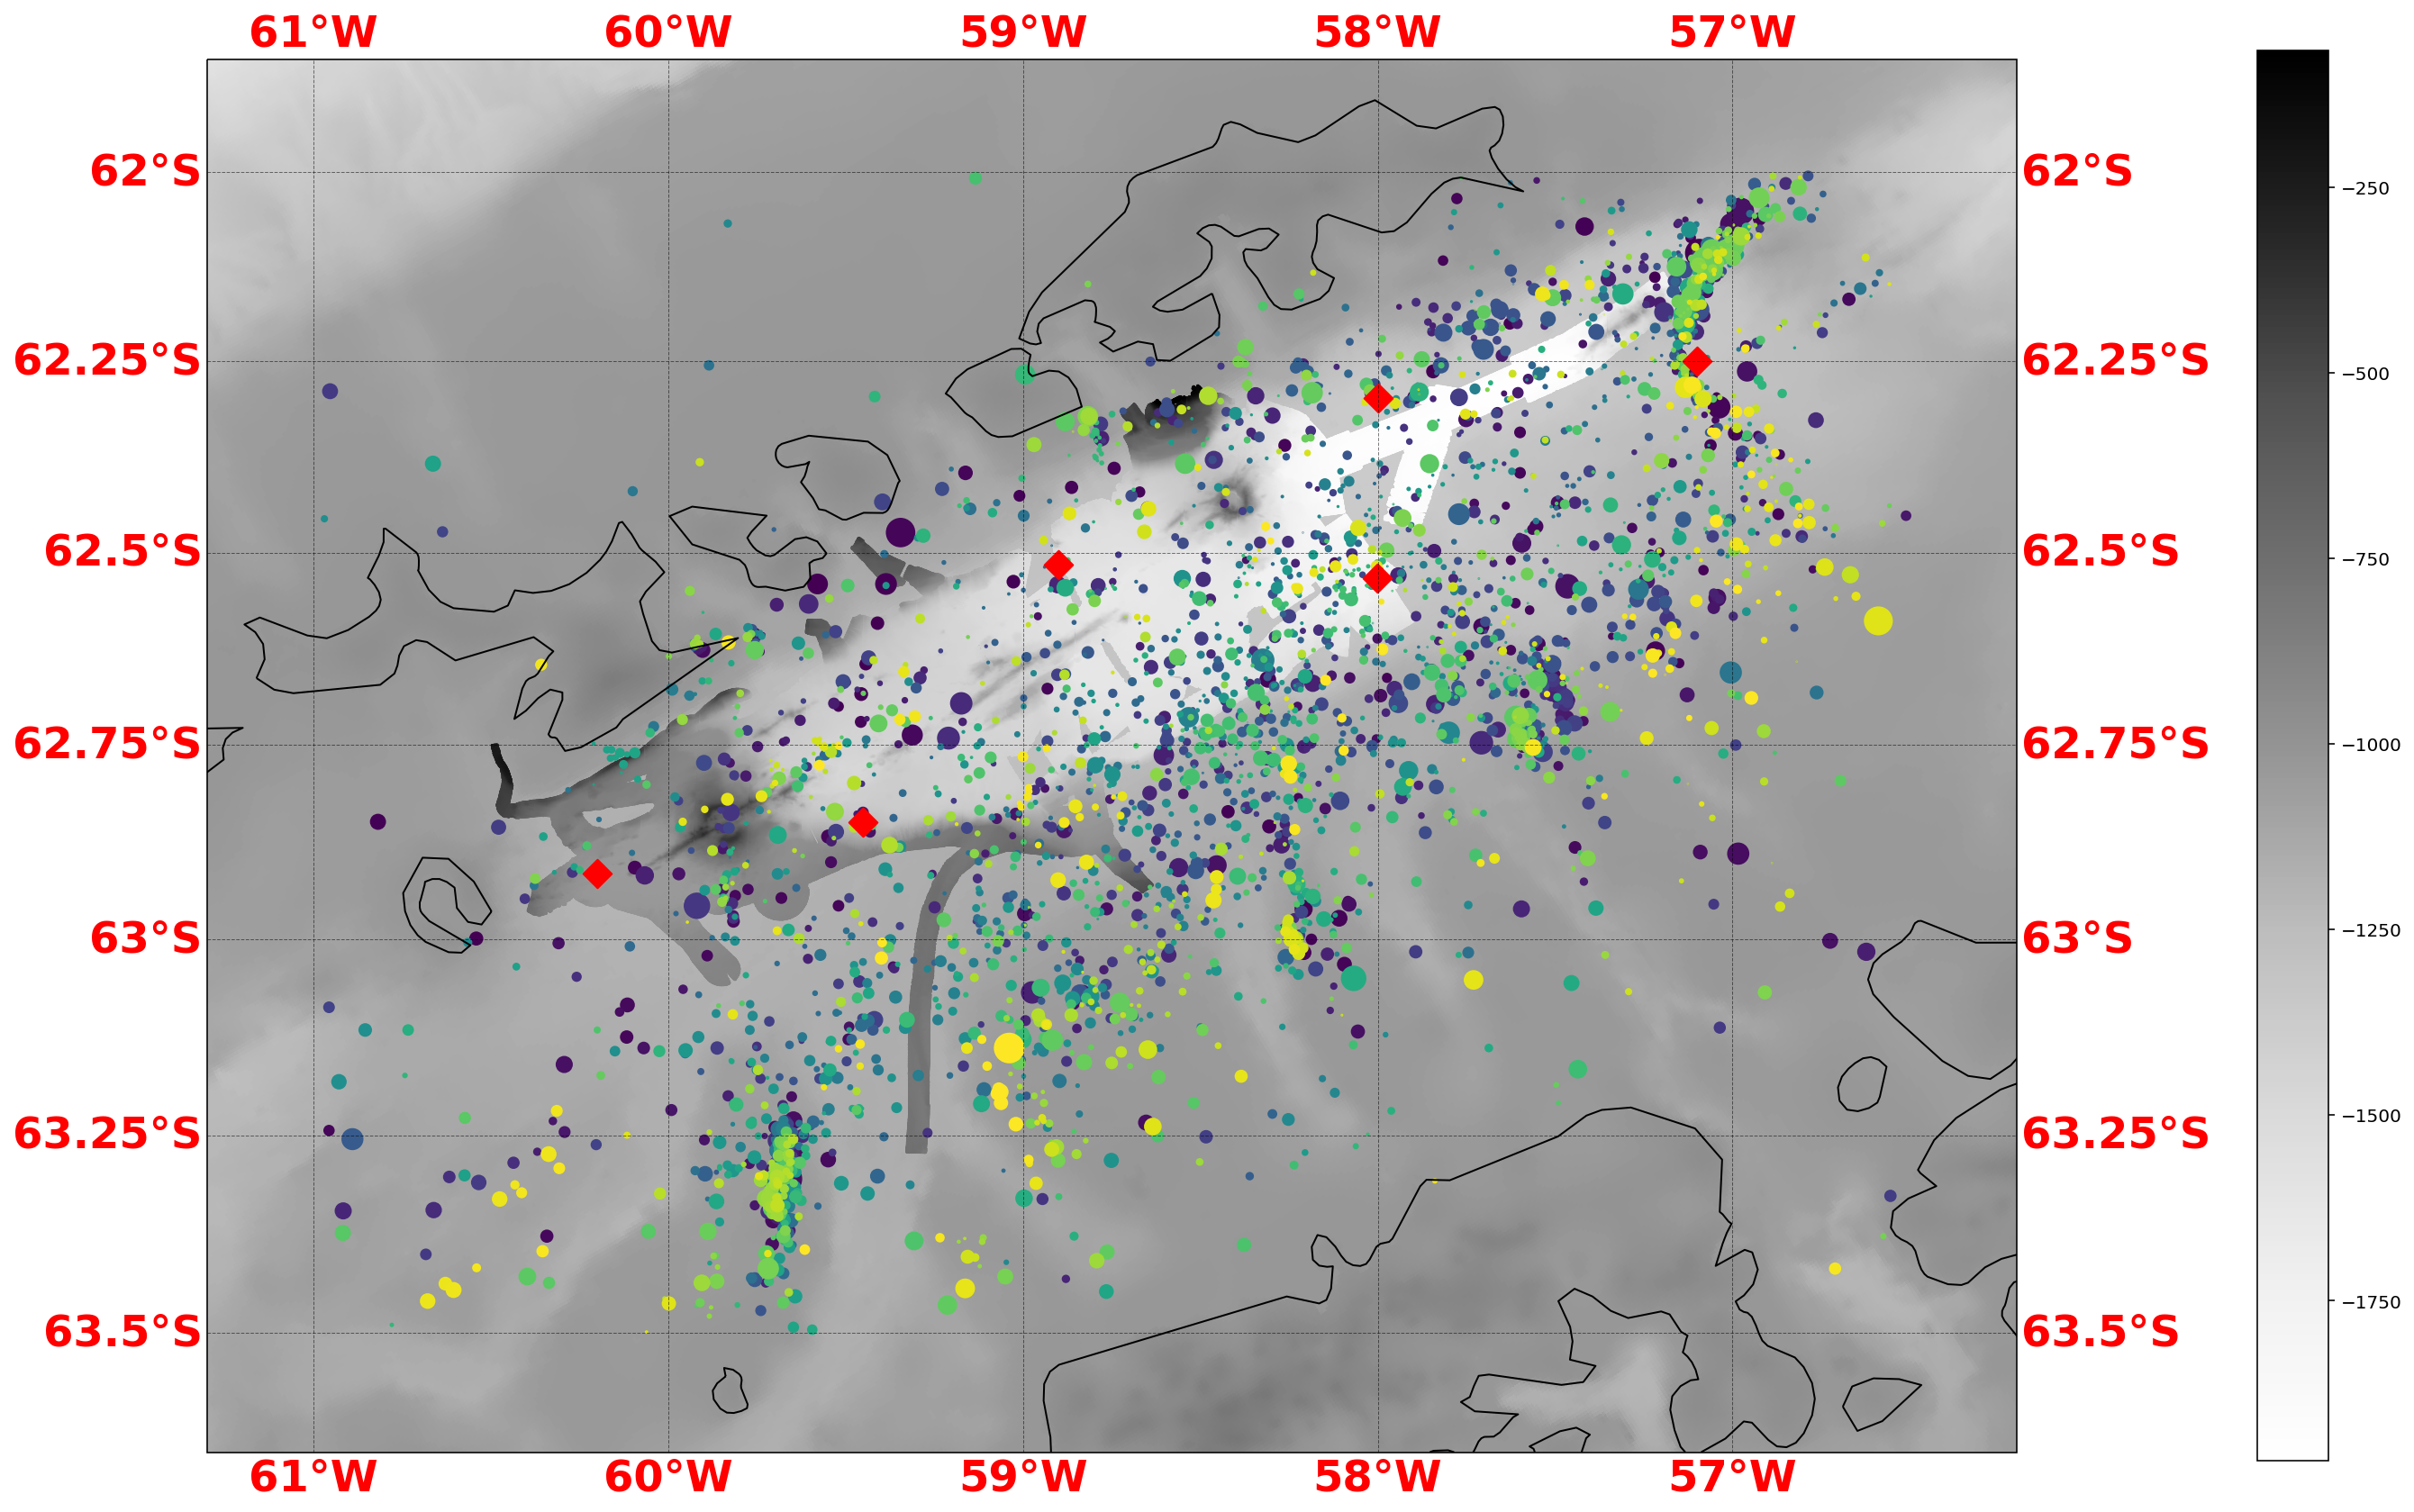

In [44]:
plt.close()
central_lon = np.mean(extents[0:2])
central_lat = np.mean(extents[2:4])
plt.rcParams['figure.figsize'] = (24,24)
ax = plt.axes(projection=ccrs.Mercator(central_longitude=central_lon, min_latitude=extents[2], max_latitude=extents[3], globe=None, latitude_true_scale=central_lat))
ax.set_extent(extents)
orca_decimate = df_bathy.iloc[::10, :]
ax.coastlines()
sc = ds_ibsco.z.plot(ax=ax, transform=ccrs.SouthPolarStereo(true_scale_latitude=-71), cmap='Greys', **{'add_colorbar':False})
dc = ax.scatter(orca_decimate.lon, orca_decimate.lat, c=orca_decimate.depth,
         s=0.2, transform=ccrs.PlateCarree(), cmap='Greys')
plt.colorbar(dc, shrink=0.6, pad = 0.1)
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='black', alpha=0.5, linestyle='--')
gl.xlabel_style = {'color': 'red', 'weight': 'bold', 'size': 24}
gl.ylabel_style = {'color': 'red', 'weight': 'bold', 'size': 24}
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ac = ax.scatter(df_iqs.ep_lon,
                df_iqs.ep_lat,
                transform= ccrs.PlateCarree(),
               s=np.power(df_iqs.normalized*4, 4), c = c_dict)
sc = ax.scatter(df_stations.lon,df_stations.lat, c = 'r',marker='D',
         s=125, transform=ccrs.PlateCarree())
plt.savefig('figures/iqs.png')